<a href="https://colab.research.google.com/github/MansurPro/walmart_dataset/blob/main/walmart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

data_set_url = "https://raw.githubusercontent.com/MansurPro/walmart_dataset/main/Walmart.csv"
data = pd.read_csv(data_set_url)

In [3]:
# Data review (5 rows)
data.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
print('\n\033[1mInference:\033[0m The Datset consists of {} features (columns) & {} samples (rows).'.format(data.shape[1], data.shape[0]))


Inference: The Datset consists of 8 features (columns) & 6435 samples (rows).


In [5]:
#Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# dataset cleaning if there are NaN values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# Reframing the columns

data.Date=pd.to_datetime(data.Date)

data['weekday'] = data.Date.dt.weekday
data['month'] = data.Date.dt.month
data['year'] = data.Date.dt.year

# df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
#                                       8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

data.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in data.columns if i not in [target]]
original_df = data.copy(deep=True)

data.head()

<ipython-input-7-3a6e11e84079>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.Date=pd.to_datetime(data.Date)


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [ ]:
# #change the data to datatime
# data['Date'] = pd.to_datetime(data['Date'],format="%d-%m-%Y")
# #create 3 columns 'month', 'year', 'Week'
# data['month'] = data['Date'].dt.month
# data['year'] = data['Date'].dt.year
# data['Week'] = data['Date'].dt.isocalendar().week
# #drop Date
# data = data.drop('Date', axis = 1)
# data.head()

In [8]:
#Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [9]:
# dataset cleaning if there are NaN values with added year, month, week columns
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

In [10]:
# save original dataset (we may manipulate dataset later)
original_data = data.copy(deep=True)

In [11]:
target = 'Weekly_Sales'
features = [i for i in data.columns if i not in [target]]
original_df = data.copy(deep=True)

data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [12]:
#Checking number of unique rows in each feature

data.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [13]:
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 5 categorical features.


In [14]:
#Checking the stats of all the columns

display(data.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


# 2. Exploratory Data Analysis (EDA)




<Figure size 800x400 with 0 Axes>

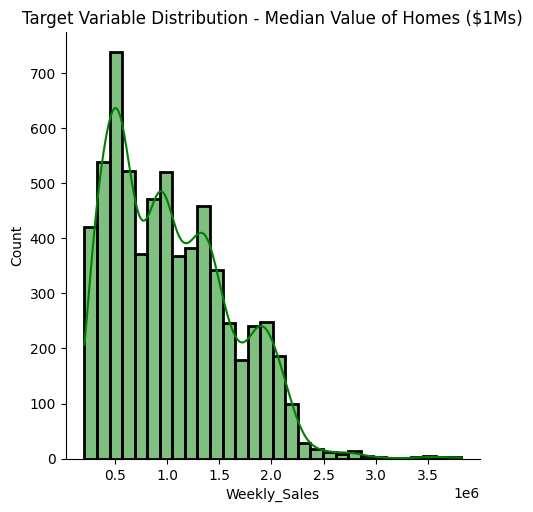

In [ ]:
#Let us first analyze the distribution of the target variable
target = 'Weekly_Sales'
plt.figure(figsize=[8,4])
sns.displot(data=data, x=target, color='g', kde=True, bins=30, edgecolor="black", linewidth=2)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

- Distribution analysis of key numerical features.

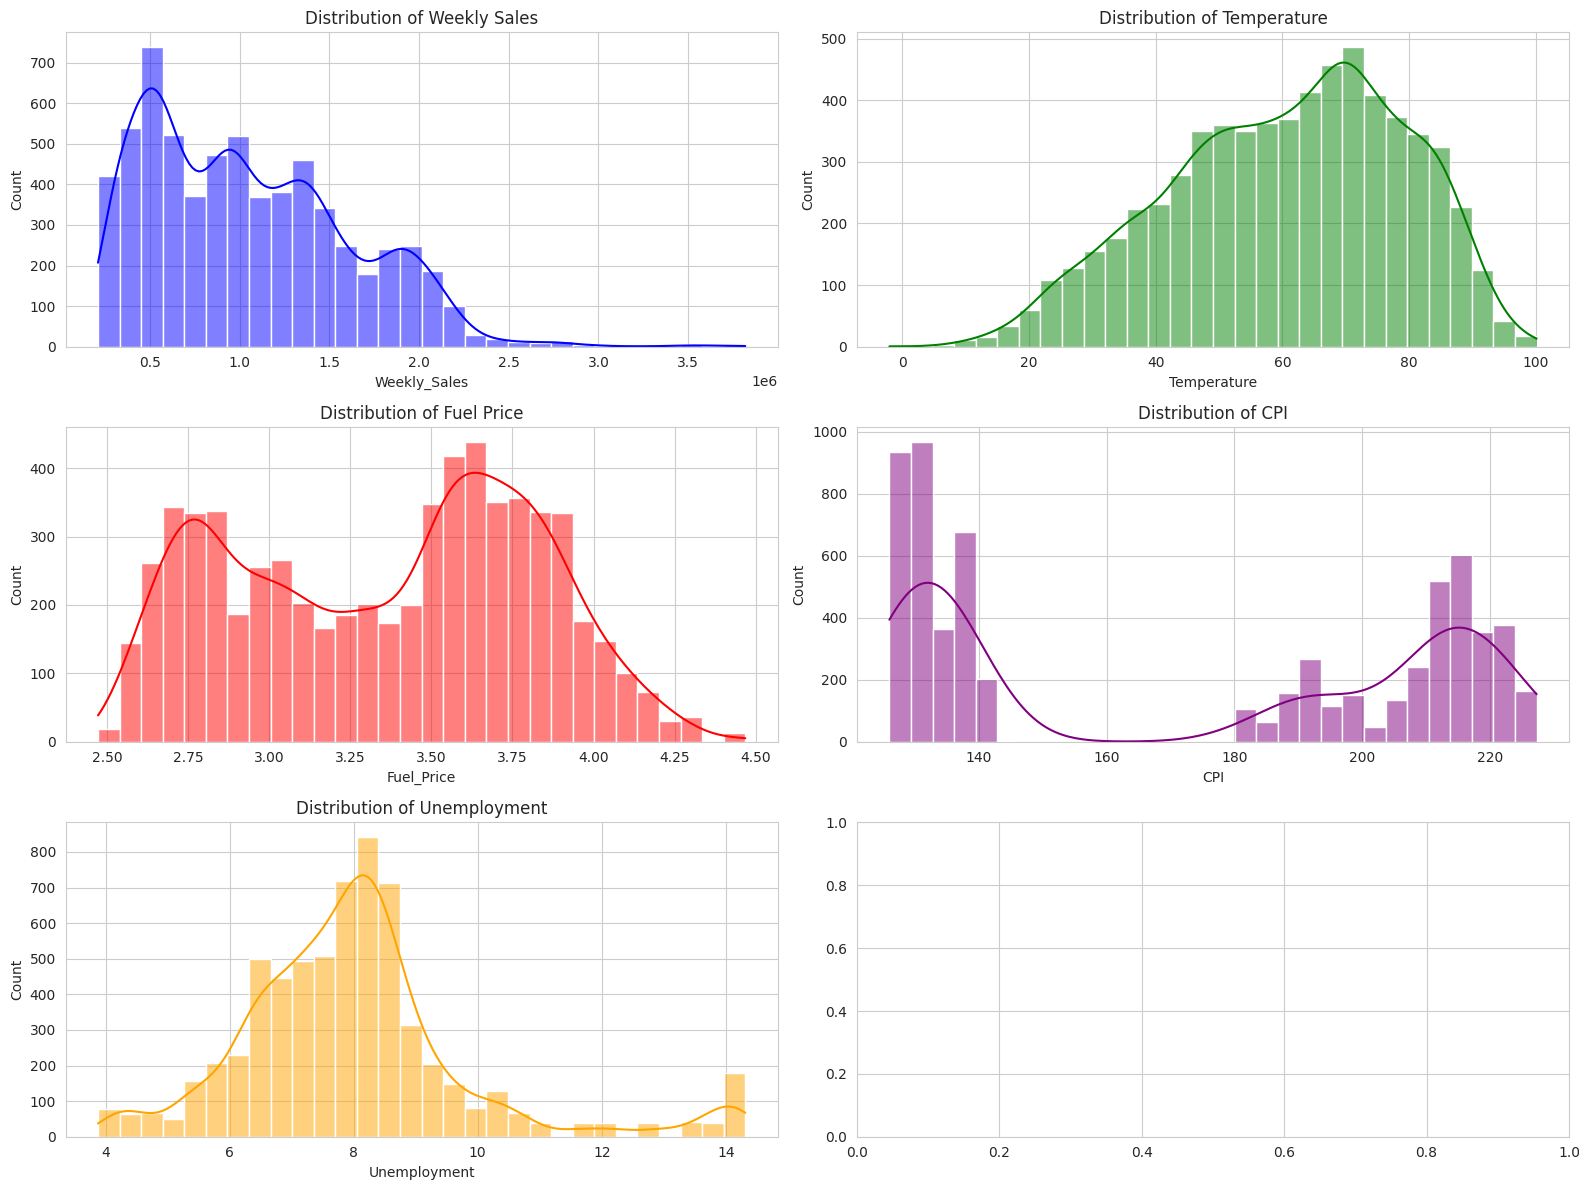

In [17]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution Analysis of key numerical features
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

# Weekly Sales Distribution
sns.histplot(data['Weekly_Sales'], bins=30, kde=True, ax=ax[0, 0], color='blue')
ax[0, 0].set_title('Distribution of Weekly Sales')

# Temperature Distribution
sns.histplot(data['Temperature'], bins=30, kde=True, ax=ax[0, 1], color='green')
ax[0, 1].set_title('Distribution of Temperature')

# Fuel Price Distribution
sns.histplot(data['Fuel_Price'], bins=30, kde=True, ax=ax[1, 0], color='red')
ax[1, 0].set_title('Distribution of Fuel Price')

# CPI Distribution
sns.histplot(data['CPI'], bins=30, kde=True, ax=ax[1, 1], color='purple')
ax[1, 1].set_title('Distribution of CPI')

# Unemployment Distribution
sns.histplot(data['Unemployment'], bins=30, kde=True, ax=ax[2, 0], color='orange')
ax[2, 0].set_title('Distribution of Unemployment')

plt.tight_layout()
plt.show()


## Holidays Flag



<ipython-input-22-6d808a3307b5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Holiday_Flag", palette='pastel')


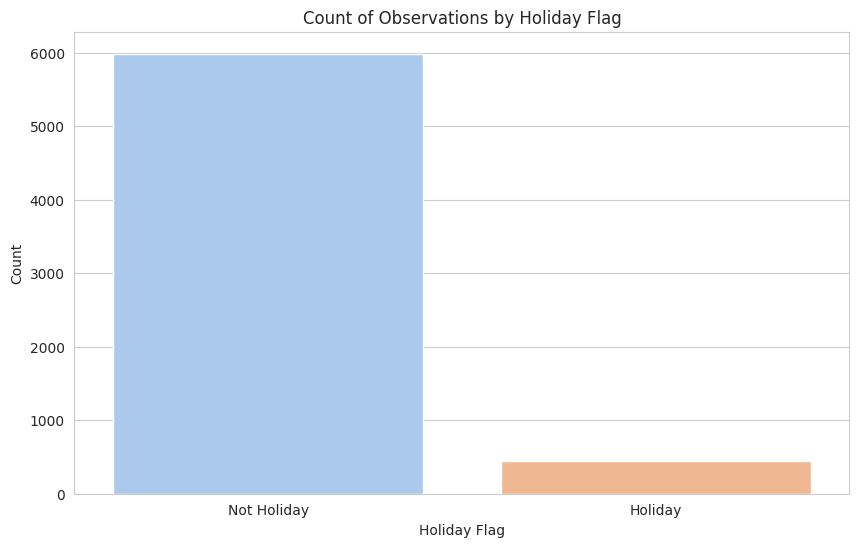

In [22]:
sns.countplot(data=data, x="Holiday_Flag", palette='pastel')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.title('Count of Observations by Holiday Flag')
plt.xticks(ticks=[0, 1], labels=['Not Holiday', 'Holiday'])

plt.show()

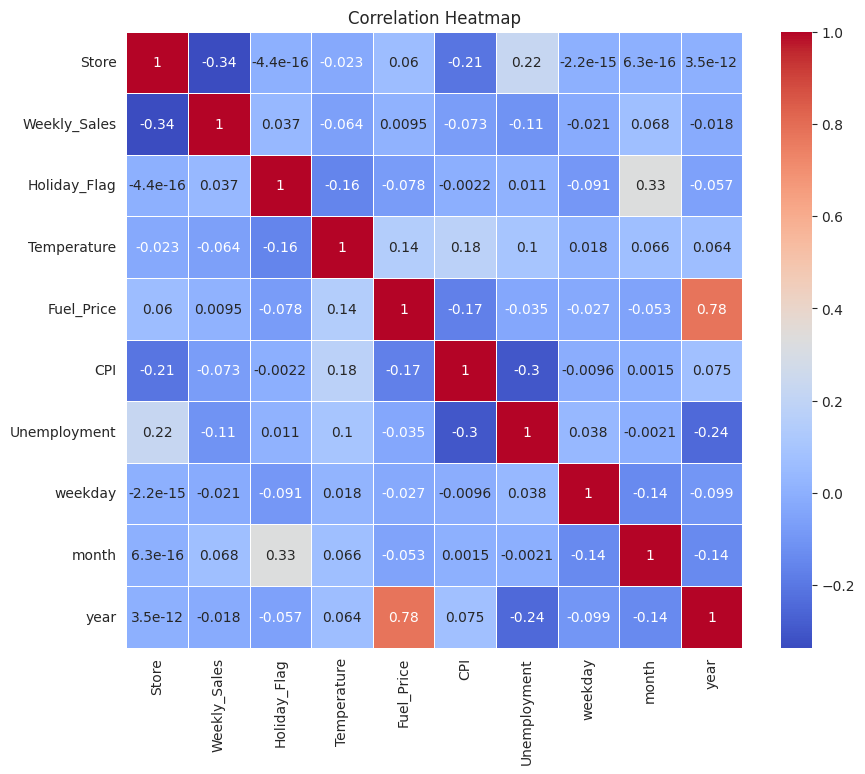

In [19]:
# Correlation Analysis
correlation_matrix = data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()